# Figure 3

In [1]:
library(bcp)
library(tidyverse)

Loading required package: grid

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
set.seed(100)

In [3]:
monthly = read_csv('Nepal/monthly.csv')

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  monthid = col_double(),
  ngo_abductions = col_double(),
  ngo_events = col_double(),
  media_abductions = col_double(),
  media_events = col_double(),
  zero = col_double(),
  abductions_delta = col_double(),
  events_delta = col_double(),
  log_abductions_delta = col_double()
)



In [4]:
weekly = read_csv('Nepal/weekly.csv')

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  weekid = col_double(),
  ngo_abductions = col_double(),
  ngo_events = col_double(),
  media_abductions = col_double(),
  media_events = col_double(),
  zero = col_double(),
  abductions_delta = col_double(),
  events_delta = col_double(),
  log_abductions_delta = col_double()
)



In [5]:
head(monthly)

X1,monthid,ngo_abductions,ngo_events,media_abductions,media_events,zero,abductions_delta,events_delta,log_abductions_delta
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,22,2,0,0,0,22,2,1.361728
1,2,0,0,0,0,0,0,0,0.000000
2,3,0,0,0,0,0,0,0,0.000000
3,4,0,0,6,1,0,-6,-1,-0.845098
4,5,0,0,0,0,0,0,0,0.000000
5,6,35,1,0,0,0,35,1,1.556303


In [6]:
head(weekly)

X1,weekid,ngo_abductions,ngo_events,media_abductions,media_events,zero,abductions_delta,events_delta,log_abductions_delta
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,10,1,0,0,0,10,1,1.041393
1,2,0,0,0,0,0,0,0,0.000000
2,3,0,0,0,0,0,0,0,0.000000
3,4,12,1,0,0,0,12,1,1.113943
4,5,0,0,0,0,0,0,0,0.000000
5,6,0,0,0,0,0,0,0,0.000000


In [7]:
bcp_ev_delta = bcp(monthly$events_delta)

In [8]:
bcp_ev_delta_weekly = bcp(weekly$events_delta)

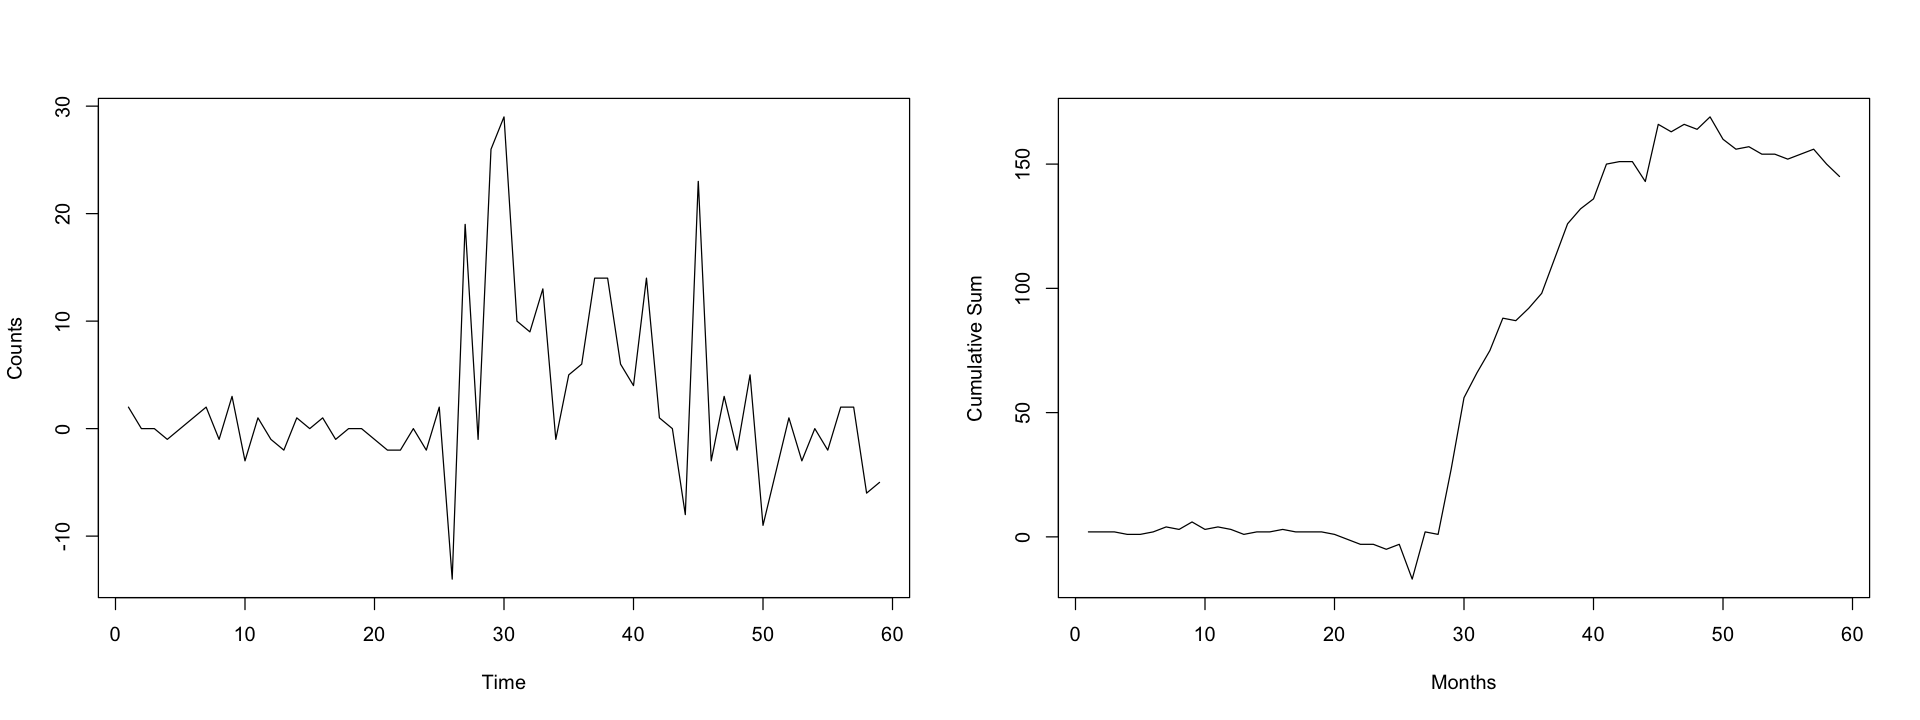

In [9]:
options(repr.plot.width=16, repr.plot.height=6)
par(mfrow=c(1,2))
plot(ts(monthly$events_delta),ylab="Counts")
plot(cumsum(ts(monthly$events_delta)),type="l",ylab="Cumulative Sum",xlab="Months")


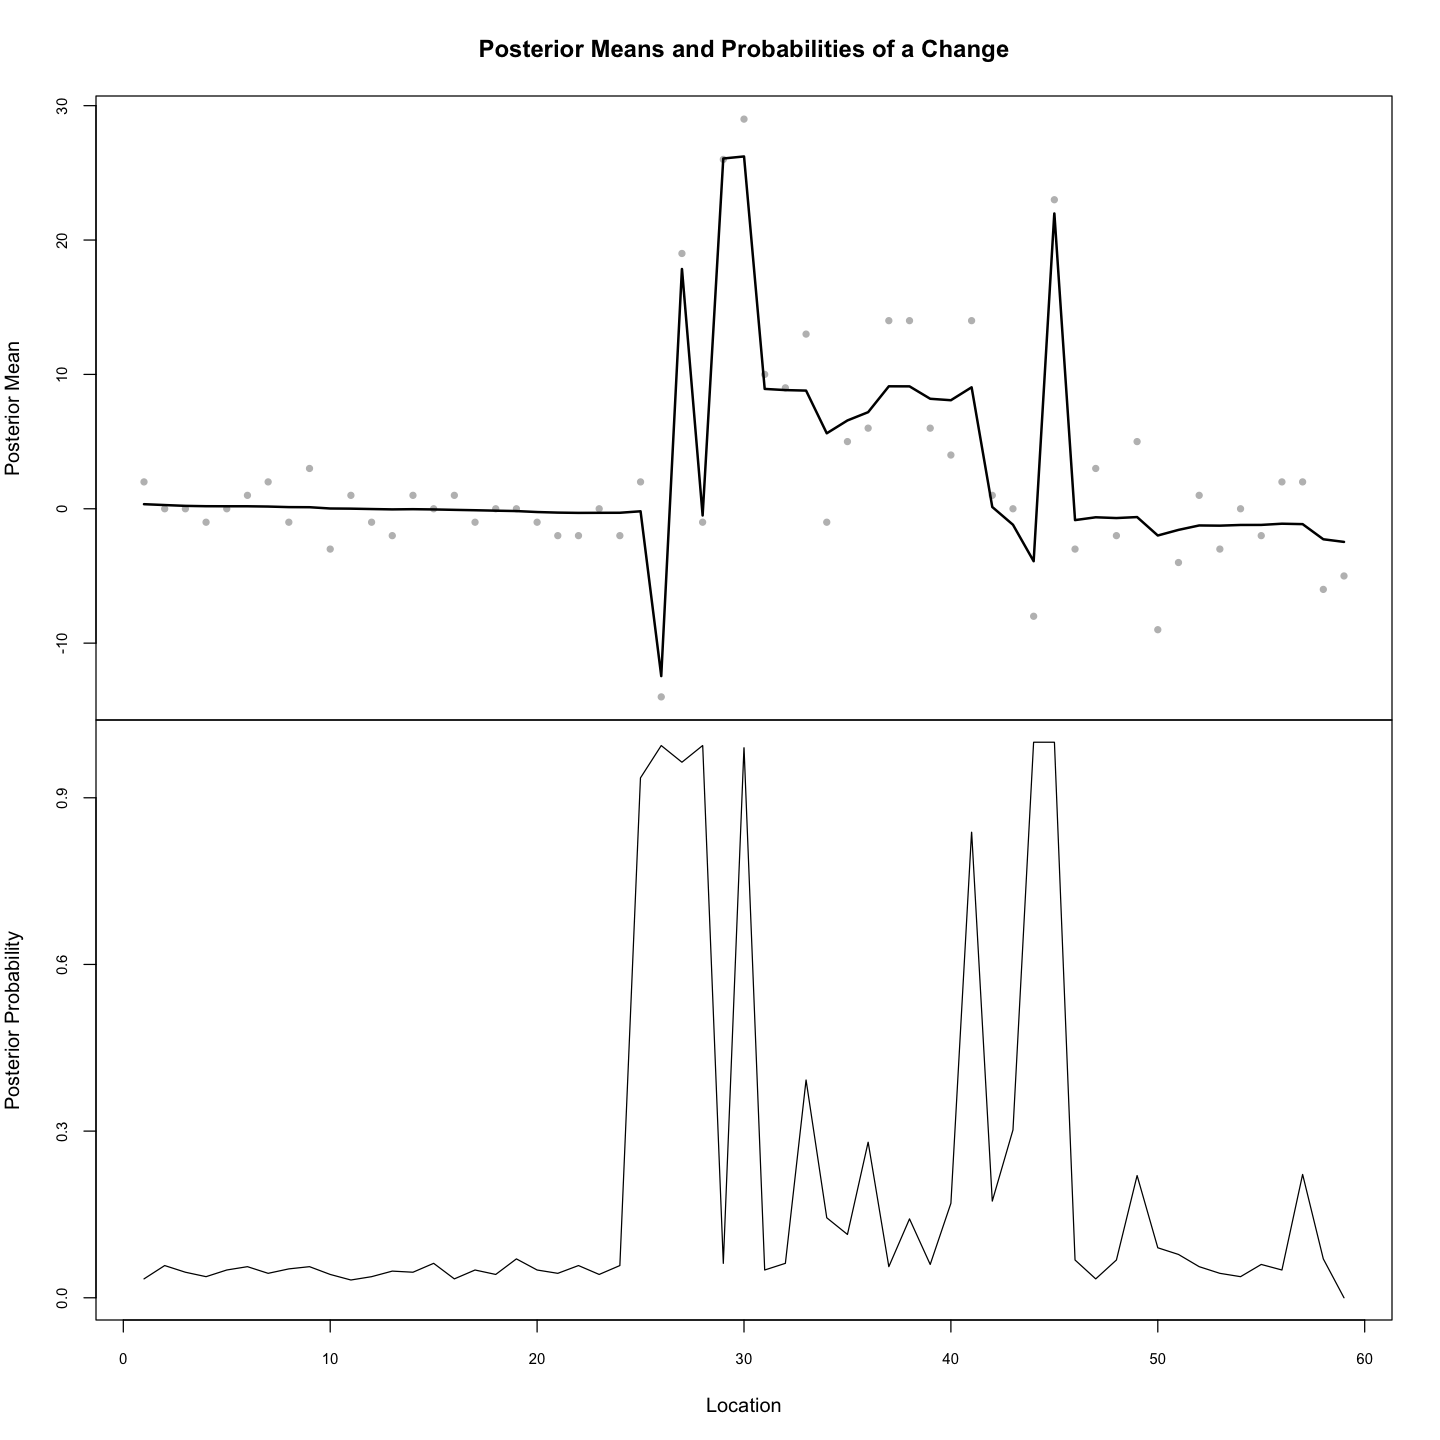

In [10]:
options(repr.plot.width=12, repr.plot.height=12)
legacyplot(bcp_ev_delta)

In [11]:
change_points_model_1 <- data.frame(cbind(bcp_ev_delta$posterior.prob,1:59))
colnames(change_points_model_1) <- c('prob','month')
change_points_model_1 %>% arrange(-prob) %>% head(10)

,prob,month
,<dbl>,<dbl>
1,1.000,44
2,1.000,45
3,0.994,26
4,0.994,28
5,0.990,30
6,0.964,27
7,0.936,25
8,0.838,41
9,0.392,33


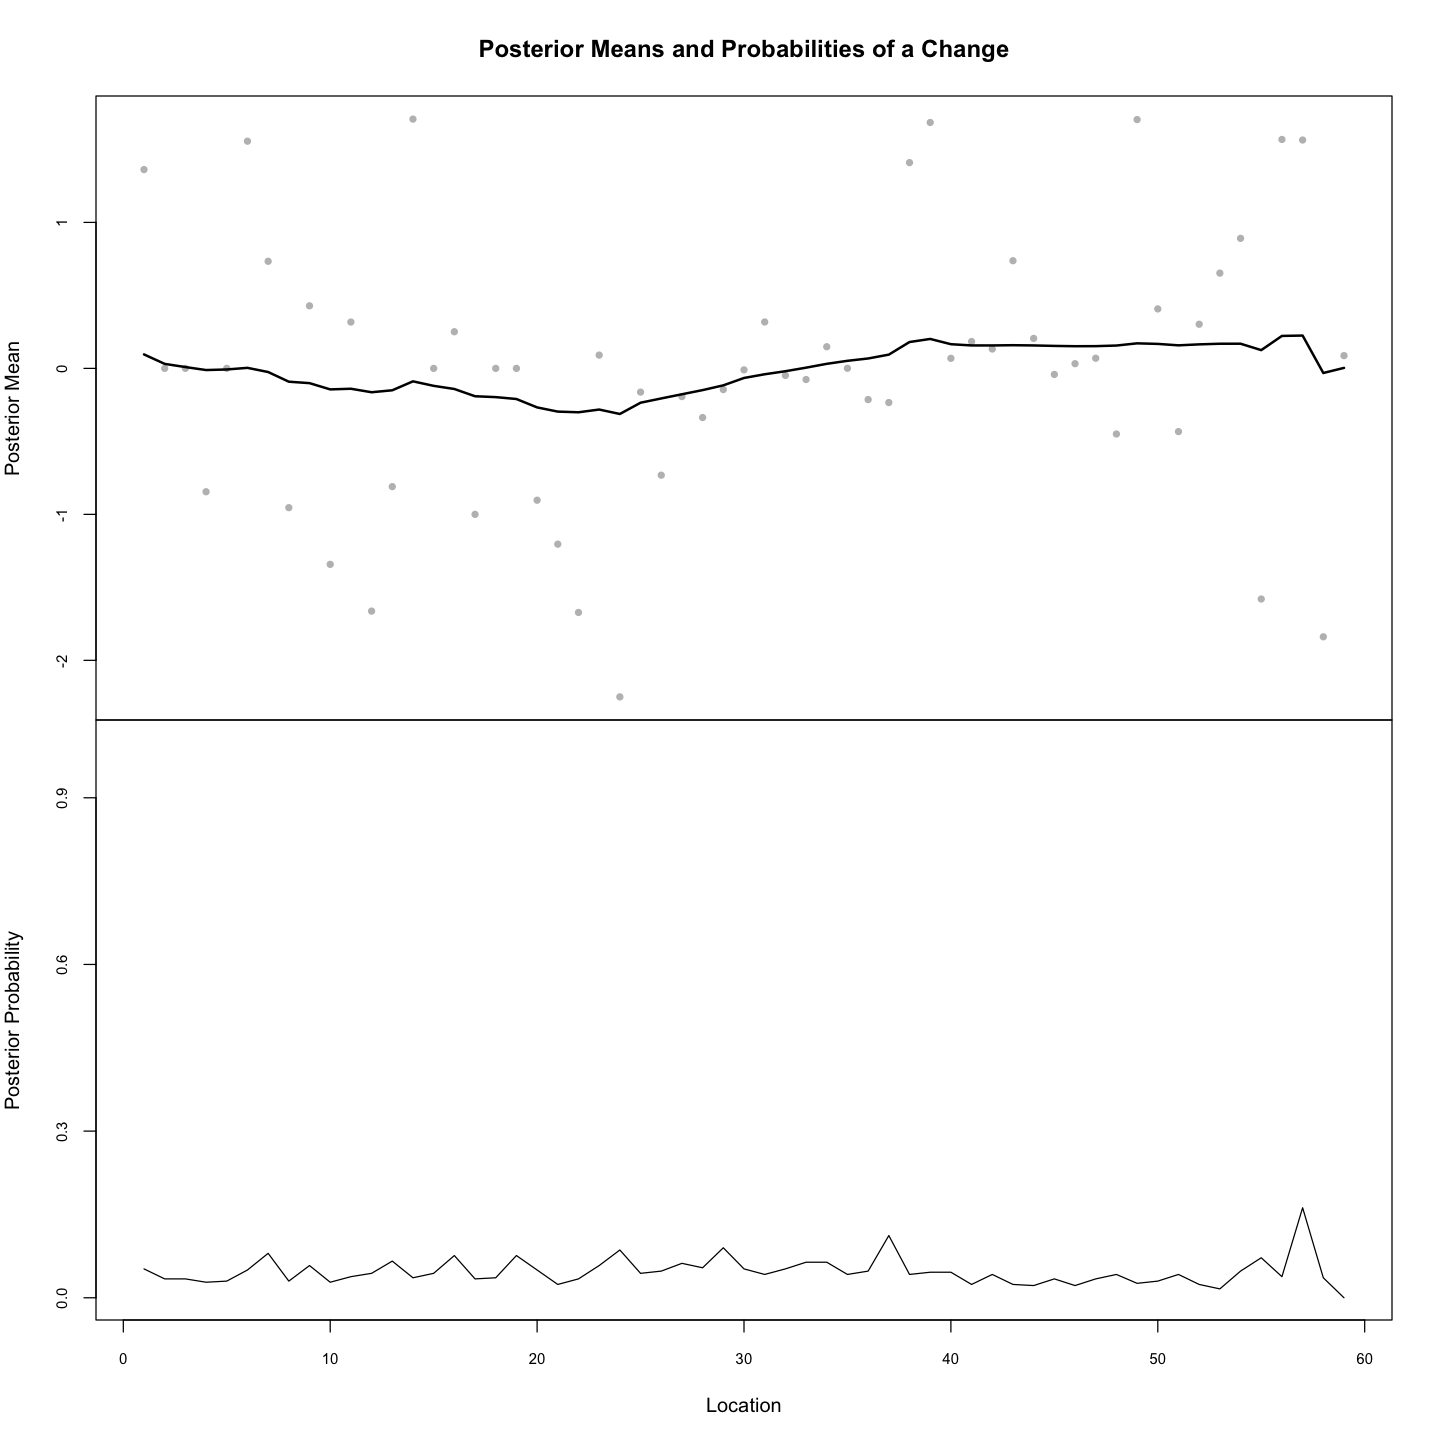

In [12]:
options(repr.plot.width=12, repr.plot.height=12)
bcp_abd_delta = bcp(monthly$log_abductions_delta)
legacyplot(bcp_abd_delta)